In [ ]:
!pip install qutip

In [ ]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/qutip/__init__.py:65: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


In [ ]:
def quantum_Hamiltonian():

  #Estado de Maxima coherencia
  state = (1/np.sqrt(2))*(basis(2,0)+basis(2,1))


  #Hamiltoniano interno del sistema
  H0 = ep*(sigmap()*sigmam())
  H0t = [H0 for step  in range(steps)]

  return(H0,state,H0t)


In [ ]:
def eigen_system():
  M_val = []
  M_vec = []
  H_val = []
  H_vec = []

  # Iteramos para cada matriz dentro de DensityM:
  for n in range(len(Hci[2])):

      qobjH = Qobj(Hci[2][n])
      qobjM = Qobj(Density_M[n])

      e_statesH = qobjH.eigenstates()
      e_statesM = qobjM.eigenstates(sort='high')

      autovals_H = e_statesH[0]
      autovals_M = e_statesM[0]

      #Conjunto de autovalores
      H_val.append(autovals_H)  #Hamiltoniano
      M_val.append(autovals_M)  #Matriz Densidad

      #Conjunto de Autovectores
      autovec_H = e_statesH[1]
      H_vec.append(autovec_H)
      autovec_M = e_statesM[1]
      M_vec.append(autovec_M)

  return(M_val, M_vec, H_val, H_vec)

\begin{align}
    \mathcal{W}(t) = \sum_{i,j}^{2} \rho_{i} \varepsilon_{j} \left(|\langle{\rho_{i}} |{\varepsilon_{j}}\rangle|^{2} -\delta_{ij} \right).
\end{align}

In [ ]:
def ergotropy():
  Erg = []
  Ut= []
  Ergo_t = 0
  i,j,k = 0,0,0
  for i in range(len(t)):
    for j in range(len(M_val[0])):
      for k in range(len(H_val[0])):
        if j==k:
          Ergo_t = Ergo_t + M_val[i][j]*H_val[i][k]*((((M_vec[i][j].dag())*(H_vec[i][k])).norm())**2-1)
        else:
          Ergo_t = Ergo_t + M_val[i][j]*H_val[i][k]*((((M_vec[i][j].dag())*(H_vec[i][k])).norm())**2)
    Erg.append(Ergo_t)
    Ergo_t = 0


    #Energía interna
    E = np.dot(Density_M[i],Hci[2][i])
    U = np.trace(E)
    Ut.append(U)

  return(Erg, Ut)


In [ ]:
def efficiency():
  Eff = np.divide(Erg,Ut)
  return Eff



\begin{align}
    \mathcal{C}_{l_{1}}(t) = \frac{1}{\mathcal{C}_{\max}}\sum_{i\neq j}|\rho_{ij}(t)|.
\end{align}

In [ ]:
def coherence():
  coherence = []
  count,cohe = 0,0
  for n in range(len(t)):
    for i in range(len(Density_M[0][:])):
      for j in range(len(Density_M[0][:])):
        if i!=j:
          count +=1
          cohe += abs(Density_M[n][i,j])
    coherence.append(cohe)
    cohe = 0

  return coherence

In [ ]:
gamma = float(input("Gamma: "))
steps =3500
t = np.linspace(0,250,steps)
ep=1

Hci = quantum_Hamiltonian()
Density_M = mesolve(Hci[0], Hci[1], t, c_ops).states
c_ops = [np.sqrt(gamma)*sigmam()]
e_ops = [sigmax(),sigmay(),sigmaz()]


Gamma: 0.1


In [ ]:
M_val, M_vec, H_val, H_vec = eigen_system()
Erg, Ut = ergotropy()
Eff = efficiency()

Text(0.5, 0, '$\\Gamma t$')

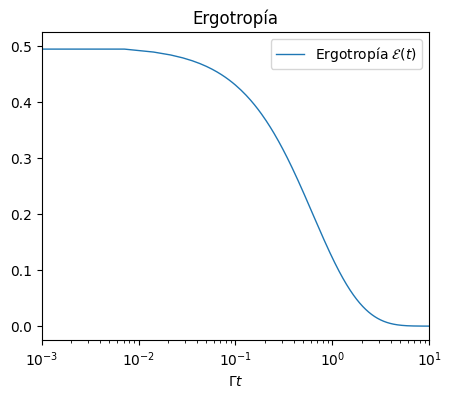

In [ ]:
fig, ax = plt.subplots(figsize=(5,4))
ax.set_title('Ergotropía',fontsize = 12 )
ax.plot(gamma*t,Erg,linewidth=1,label=r"Ergotropía $\mathcal{E}(t)$")
ax.set_xscale('log')
ax.set_xlim(0.001,10)
ax.legend()
ax.set_xlabel(r"$\Gamma t$")

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0, '$\\Gamma t$')

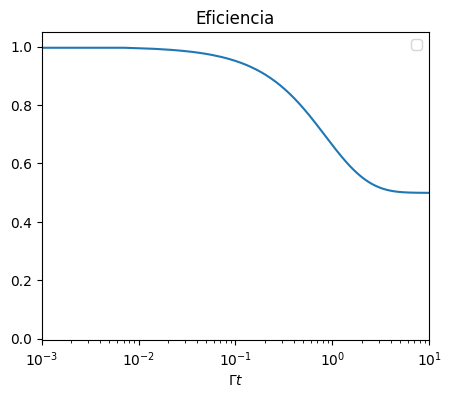

In [ ]:
fig, ax = plt.subplots(figsize=(5,4))
ax.set_title('Eficiencia',fontsize = 12 )
ax.plot(gamma*t,Eff,linewidth=1.5)
ax.set_xscale('log')
ax.set_xlim(0.001,10)
ax.set_ylim(-0.005,1.05)
ax.legend()
ax.set_xlabel(r"$\Gamma t$")

In [ ]:
Coherence_t =coherence()

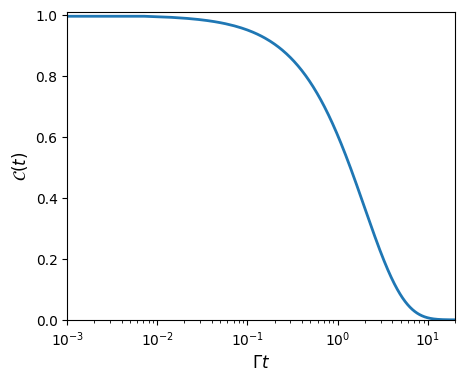

In [ ]:
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(gamma*t,np.multiply(1/max(Coherence_t),Coherence_t))
ax.set_xscale('log')
ax.set_xlabel('$\Gamma t$',fontsize=12)
ax.set_ylabel(r'$\mathcal{C}(t)$',fontsize=12)
ax.set_xlim(0.001,20)
ax.set_ylim(-0.001,1.01)
fig.savefig('Coh_SHC.eps')

In [ ]:
result = mesolve(Hci[0], Hci[1], t, c_ops, e_ops)
sx, sy, sz =  result.expect[0], result.expect[1], result.expect[2]

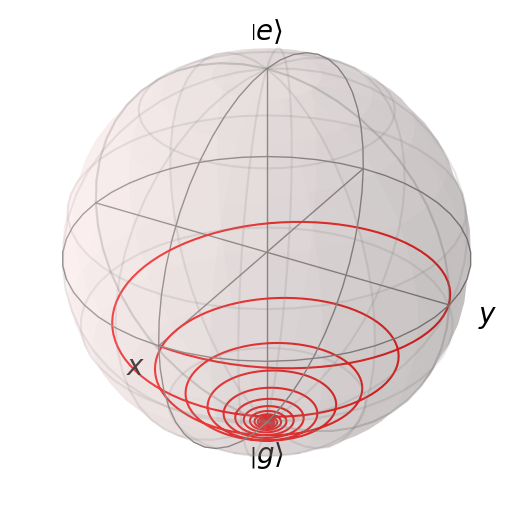

In [ ]:
sphere = Bloch()
sphere.zlabel = ['$\\left|e\\right>$','$\\left|g\\right>$']
sphere.add_points([sx,sy,sz], meth='l')
sphere.point_color = ['r']
sphere.show()
fig.savefig('bloch_sphere_SHC.pdf')